Etudiants (GROUPE 3): 
   * Marion MOTA
   * Aymeric LARVET
   * Maxime D'HARBOULLE
   * Julien DA CORTE
   * Gwendal SIWIOREK

# Problématique métier

Notre objectif durant cette étude est de déterminer si un personne va se faire vacciner ou non (pour le H1N1) selon ses informations. Le dataset est basé sur des personnes basées aux USA.


# Préparation des données

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#pd.set_option('max_columns', None)

In [2]:
raw_data = pd.read_csv("input/training_set_features.csv", ",")

D:\ESGI\5AL\ML\ML-TP\venv\lib\site-packages\IPython\core\interactiveshell.py:3369: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Regarder dans la base
raw_data.head() # afficher les 5 premières lignes

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
print(raw_data.shape)
raw_data.info()

(26707, 36)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  chil

Après étude nous devons effectuer les traitements suivants sur le dataset : 
* Suppression de la colonne "respondent_id".
* Cast des colonnes objets en String.

In [5]:
# Chargement de la target
raw_y = pd.read_csv("input/training_set_labels.csv", ",")

D:\ESGI\5AL\ML\ML-TP\venv\lib\site-packages\IPython\core\interactiveshell.py:3369: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
print(raw_y.shape)
raw_y.info()

(26707, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


Après étude nous devons effectuer les traitements suivants sur le dataset : 
* Suppression des colonnes suivantes => respondent_id, seasonal_vaccine

In [7]:
remove_list = ['respondent_id', 'seasonal_vaccine']
y = raw_y.drop(columns=remove_list)
raw_data = raw_data.drop(columns=['respondent_id']) 

In [8]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   h1n1_vaccine  26707 non-null  int64
dtypes: int64(1)
memory usage: 208.8 KB


In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

## Conversion des types objets en string.

In [10]:
# récupérer les colonnes à convertir
stringcols = raw_data.select_dtypes(include='object').columns
stringcols

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation'],
      dtype='object')

In [11]:
raw_data_conv = raw_data.copy()
raw_data_conv[stringcols] = raw_data_conv[stringcols].astype(str)
raw_data_conv[stringcols] = raw_data_conv[stringcols].astype("string")
raw_data_conv[stringcols] = raw_data_conv[stringcols].replace({pd.NA: np.nan})
raw_data_conv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

Nous avons maintenant une target propre et un dataset correctement typé.

## Recherche des valeurs manquantes

In [12]:
# nombre de valeurs manquantes
print(raw_data.isnull().sum().sort_values(ascending=False))

employment_occupation          13470
employment_industry            13330
health_insurance               12274
income_poverty                  4423
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
rent_or_own                     2042
employment_status               1463
marital_status                  1408
education                       1407
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
opinion_seas_sick_from_vacc      537
opinion_seas_risk                514
opinion_seas_vacc_effective      462
opinion_h1n1_sick_from_vacc      395
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
household_children               249
household_adults                 249
behavioral_avoidance             208
behavioral_touch_face            128
h1n1_knowledge                   116
h1n1_concern                      92
behavioral_large_gatherings       87
behavioral_outside_home           82
b

In [13]:
# Proportion de valeurs manquantes
print(raw_data.isnull().mean().sort_values(ascending=False))

employment_occupation          0.504362
employment_industry            0.499120
health_insurance               0.459580
income_poverty                 0.165612
doctor_recc_h1n1               0.080878
doctor_recc_seasonal           0.080878
rent_or_own                    0.076459
employment_status              0.054780
marital_status                 0.052720
education                      0.052683
chronic_med_condition          0.036358
child_under_6_months           0.030704
health_worker                  0.030104
opinion_seas_sick_from_vacc    0.020107
opinion_seas_risk              0.019246
opinion_seas_vacc_effective    0.017299
opinion_h1n1_sick_from_vacc    0.014790
opinion_h1n1_vacc_effective    0.014640
opinion_h1n1_risk              0.014528
household_children             0.009323
household_adults               0.009323
behavioral_avoidance           0.007788
behavioral_touch_face          0.004793
h1n1_knowledge                 0.004343
h1n1_concern                   0.003445


Après analyse, nous avons 3 colonnes avec un fort taux de données manquantes (employment_occupation, employment_industry, health_insurance).


Ce sont des informations qui nous semblent très importantes, néanmoins du fait des 50% de données manquantes nous devons les supprimer. Etant donné qu'aux USA les personnes n'ont pas d'assurance maladie la colonne health_insurance ne nous semble pas pertinente.

In [14]:
# Suppression 
remove_cant_impute_list = ['employment_occupation', 'employment_industry', 'health_insurance']
raw_data = raw_data.drop(columns=remove_cant_impute_list)

# Imputation & Sélection des variables explicatives

### Imputation

Après analyse des valeures manquantes : 
* Toutes les valeurs sont catégorielles, donc on va les imputer par leur mode (valeure la plus fréquente)

In [15]:
from sklearn.impute import SimpleImputer

columns = raw_data.columns
raw_data_conv = raw_data
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit(raw_data_conv[columns])

# mean (=moyenne), most_frequent (=mode), median

data_impute = imputer.transform(raw_data_conv[columns].values)

data_impute_auto_float = pd.DataFrame(data_impute, columns = columns)

print(data_impute_auto_float)
print(data_impute_auto_float.info())

data_impute_auto_float.describe()

D:\ESGI\5AL\ML\ML-TP\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


      h1n1_concern h1n1_knowledge behavioral_antiviral_meds  \
0              1.0            0.0                       0.0   
1              3.0            2.0                       0.0   
2              1.0            1.0                       0.0   
3              1.0            1.0                       0.0   
4              2.0            1.0                       0.0   
...            ...            ...                       ...   
26702          2.0            0.0                       0.0   
26703          1.0            2.0                       0.0   
26704          2.0            2.0                       0.0   
26705          1.0            1.0                       0.0   
26706          0.0            0.0                       0.0   

      behavioral_avoidance behavioral_face_mask behavioral_wash_hands  \
0                      0.0                  0.0                   0.0   
1                      1.0                  0.0                   1.0   
2                      1

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
count,26707.0,26707.0,26707.0,26707.0,26707.0,26707.0,26707.0,26707.0,26707.0,26707.0,...,26707,26707,26707,26707,26707,26707,26707,26707,26707.0,26707.0
unique,4.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,4,2,3,2,2,3,10,3,4.0,4.0
top,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",1.0,0.0
freq,10667.0,14714.0,25406.0,19436.0,24866.0,22057.0,17160.0,17726.0,18129.0,21299.0,...,21222,15858,17200,14963,20778,15023,4297,11645,14723.0,18921.0


In [16]:
data_impute_auto_float.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   h1n1_concern                 26707 non-null  object
 1   h1n1_knowledge               26707 non-null  object
 2   behavioral_antiviral_meds    26707 non-null  object
 3   behavioral_avoidance         26707 non-null  object
 4   behavioral_face_mask         26707 non-null  object
 5   behavioral_wash_hands        26707 non-null  object
 6   behavioral_large_gatherings  26707 non-null  object
 7   behavioral_outside_home      26707 non-null  object
 8   behavioral_touch_face        26707 non-null  object
 9   doctor_recc_h1n1             26707 non-null  object
 10  doctor_recc_seasonal         26707 non-null  object
 11  chronic_med_condition        26707 non-null  object
 12  child_under_6_months         26707 non-null  object
 13  health_worker                26

In [17]:
numerical_columns_list = raw_data.select_dtypes(include='float').columns
raw_data = data_impute_auto_float

## Corrélation

In [21]:
corr = raw_data[numerical_columns_list.to_list()].corr()

ValueError: zero-size array to reduction operation fmin which has no identity

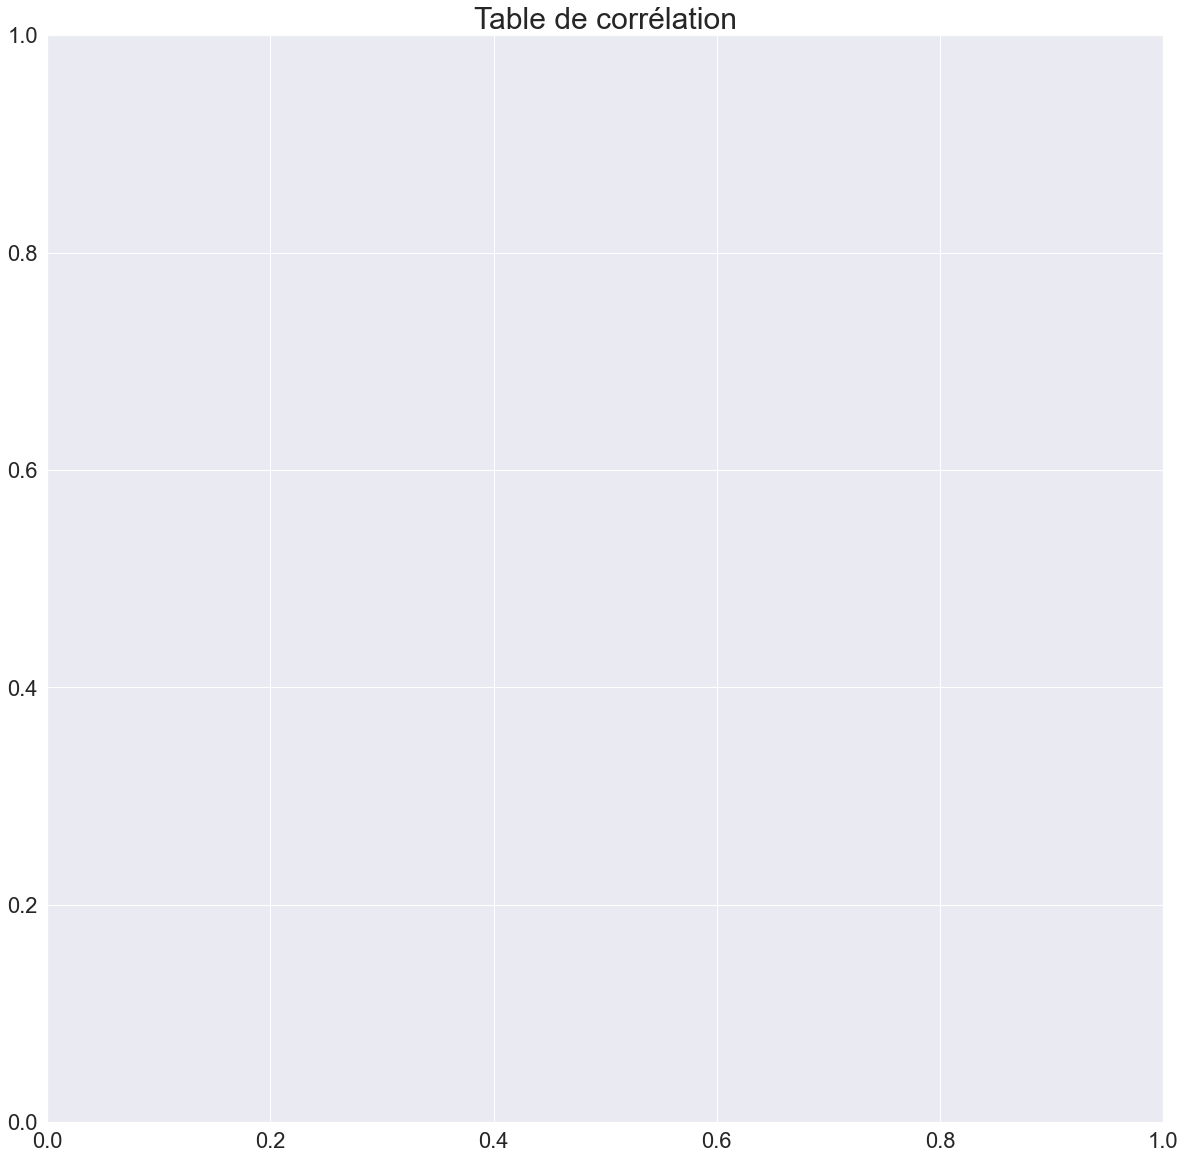

In [22]:
# graphique des correlations
plt.figure(figsize=(20, 20))

plt.title("Table de corrélation", fontsize=30)

sns.set(style="darkgrid", font_scale=2)
plt.xlabel("",fontsize=20)
plt.ylabel("",fontsize=20)

sns.heatmap(corr, 
            cmap='viridis',
            cbar=True,
            #vmax=1.0, vmin=-1.0,
            linewidths=0.3,
            annot=True,
            #annot_kws={"size": 8}, square=True
           );

Après analyse de la matrice de correlation, on decide de ????

In [ ]:
cols_to_drop = ['reanalysis_avg_temp_k', 'reanalysis_tdtr_k', 'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg']
raw_data = raw_data.drop(cols_to_drop, axis=1)
raw_data.info()


### Normalisation

On ne va pas devoir normaliser nos données car nous traitons que des données categroielles sans unitées.

# Création des models

In [23]:
# Fin de la preparation des données, elles sont maintenant propre
data_clean = raw_data

## Splitting des données

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score

In [28]:
X_train, X_test, y_train, y_test = train_test_split(data_clean, y, test_size=0.2, random_state=5)

print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (21365, 32)
Test set: (5342, 32)


## KNN

In [29]:
# Specific values for knn ( filtering out categorial (string) values)

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(data_clean[numerical_columns_list], y, test_size=0.2, random_state=5)

print('Train set:', X_train_knn.shape)
print('Test set:', X_test_knn.shape)

Train set: (21365, 22)
Test set: (5342, 22)


### Création

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# trouver le k optimal pour le nb de neighbors avant la declaration du knn ci dessous 

## Automatique
# définissons les paramètress
param_grid = {'n_neighbors': np.arange(1, 20),
              'metric': ['euclidean', 'manhattan']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_knn.fit(X_train_knn, y_train_knn)
#print(grid_knn.best_score_)
print(grid_knn.best_params_)


from sklearn.neighbors import KNeighborsClassifier

# déclaration de l'intention de knn
knn = KNeighborsClassifier(n_neighbors=grid_knn.best_params_["n_neighbors"])

# Entrainement du modèle
knn.fit(X_train_knn, y_train_knn)

D:\ESGI\5AL\ML\ML-TP\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ESGI\5AL\ML\ML-TP\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ESGI\5AL\ML\ML-TP\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ESGI\5AL\ML\ML-TP\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

D:\ESGI\5AL\ML\ML-TP\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ESGI\5AL\ML\ML-TP\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ESGI\5AL\ML\ML-TP\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ESGI\5AL\ML\ML-TP\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

### Evaluation

In [ ]:
# Evaluation --------------

# Simple

#print('train score:', knn.score(X_train, y_train))
#print('test score:', knn.score(X_test, y_test))

from sklearn.metrics import f1_score, confusion_matrix, classification_report

y_test_predit = knn.predict(X_test_knn)

confusion_matrix(y_test_knn, y_test_predit)

# calcul de la précision, du rappel et du F-score
#print(classification_report(y_test, y_test_predit))


# Cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(knn, X_train_knn, y_train_knn, cv=5, scoring='accuracy')
cross_val_score(knn, X_train_knn, y_train_knn, cv=5, scoring='accuracy').mean()

# Courbe d'apprentissage
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(knn, X_train_knn, y_train_knn, train_sizes=np.linspace(0.1, 1, 10), cv=5)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

## Random Forest

### Création

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
# Entrainement du modèle
rf.fit(X_train, y_train)

### Evaluation

In [ ]:
# Calcul de score

print('train score:', rf.score(X_train, y_train))
print('test score:', rf.score(X_test, y_test))

y_test_rf_predit = rf.predict(X_test)

N_rf, train_score_rf, val_score_rf = learning_curve(rf, X_train, y_train, 
                                                    train_sizes=np.linspace(0.1, 1, 10),
                                                    cv=5, scoring='accuracy')

confusion_matrix(y_test, y_test_rf_predit)

plt.plot(N_rf, train_score_rf.mean(axis=1), label='train_rf')
plt.plot(N_rf, val_score_rf.mean(axis=1), label='validation_rf')
plt.xlabel('train_sizes')
plt.legend()

# calcul de la précision, du rappel et du F-score
print(classification_report(y_test, y_test_rf_predit))

cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy').mean()
pd.DataFrame(rf.feature_importances_).plot.bar(figsize=(12, 8))

## Arbre de décision

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print('train score:', dt.score(X_train, y_train))
print('test score:', dt.score(X_test, y_test))
y_test_dt_predit = dt.predict(X_test)

#confusion_matrix(y_test, y_test_dt_predit)

#print(classification_report(y_test, y_test_dt_predit))
from sklearn.tree import export_graphviz
FEATURE_NAMES = ["age", "sex", "cp", "trestbps", "chol", "fbs", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]
#export_graphviz(dt, 'tree.dot', feature_names = FEATURE_NAMES)
!dot -Tpng tree.dot -o tree.png
import matplotlib.pyplot as plt
#import cv2 #pip install opencv-python opencv-python-headless
#%matplotlib inline
#img = cv2.imread('tree.png')
#plt.figure(figsize = (20, 20))
#plt.imshow(img)

# Conclusion

En conclusion, la regression linéaire nous fait avoir le meilleur score. En effet les algos de classifications ne sont pas fait pour ce cas d'usage (de la regression pure).